<a href="https://colab.research.google.com/github/WISDOM-OSBORN/Bioinformatics/blob/main/group_9_bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:Purple;
           font-size:210%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          text-align:center;"
          >
       WELCOME TO GROUP 9 NOTEBOOK
</p>
</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This dataset offers an opportunity to delve into the factors that contribute to cardiovascular disease risk among adults. The primary objective is to gain insights into how specific demographic variables, health behaviors, and biological indicators influence the development of heart ailments.

To initiate the exploration, it's advisable to peruse the various data columns and acquaint oneself with their meanings. Each field provides distinct information pertaining to heart health:

- **Age**: Represents the age of the participant (integer).
- **Gender**: Indicates the gender of the participant (male/female).
- **Height**: Specifies the participant's height in centimeters (integer).
- **Weight**: Indicates the participant's weight in kilograms (integer).
- **Ap_hi**: Denotes the systolic blood pressure reading obtained from the patient (integer).
- **Ap_lo**: Signifies the diastolic blood pressure reading obtained from the patient (integer).
- **Cholesterol**: Reflects the total cholesterol level measured in mg/dL on a scale ranging from 0 to 5+ units (integer). Each unit signifies an increment or decrement of 20 mg/dL, respectively.
- **Gluc**: Represents the glucose level measured in mmol/l on a scale from 0 to 16+ units (integer). Each unit signifies an increase or decrease of 1 mmol/L, respectively.
- **Smoke**: Indicates whether the individual is a smoker or not (binary; 0 = No, 1 = Yes).
- **Alco**: Indicates whether the individual consumes alcohol or not (binary; 0 = No, 1 = Yes).
- **Active**: Indicates whether the individual engages in regular physical activity or not (binary; 0 = No, 1 = Yes).
- **Cardio**: Indicates whether the individual suffers from cardiovascular diseases or not (binary; 0 = No, 1 = Yes).

In summary, this dataset offers a comprehensive foundation for investigating the intricate interplay between these factors and their impact on cardiovascular health.

In [ ]:
# import all the necessary libraraies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the dataset
dataframe=pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS /heart_data.csv")

In [ ]:
# check the top 5 rows of data
dataframe.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# check the bottom 5 rows of the dataframe
dataframe.tail()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:
# check the shape of data
dataframe.shape

(70000, 14)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [ ]:
dataframe.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Lets drop the index and id from the dataset that has no impact on the target variable
dataframe.drop(["index", "id"], axis=1, inplace=True)

In [ ]:
dataframe.shape

(70000, 12)

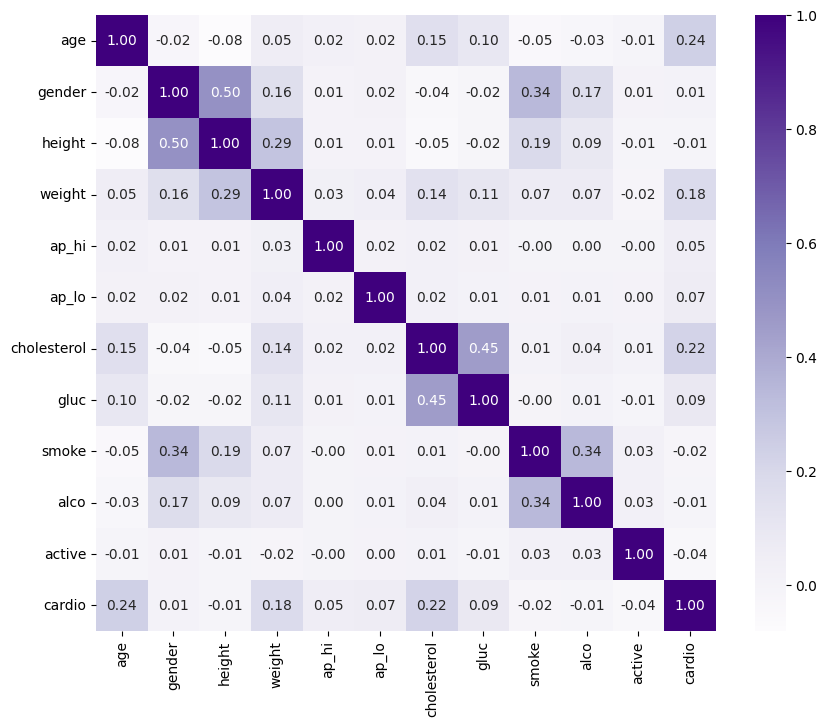

In [ ]:
# Lets make the correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(dataframe.corr(), annot=True, cmap="Purples", fmt=".2f")
plt.show()

In [ ]:
# To check Is there any null values in the dataset
dataframe.isna().sum()

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


In [ ]:
# To check Is there any duplicate value in the dataset
dataframe.duplicated().sum()

np.int64(24)

In [ ]:
# Lets remove the duplicate values from the dataset
dataframe.drop_duplicates(inplace=True)

# Exploratory Data Anlaysis

# Univariate Analysis

In [ ]:
# Lets check the dataset is balanced or not
dataframe["cardio"].value_counts()

,count
cardio,
0,35004
1,34972


In [ ]:
dataframe["smoke"].value_counts()

,count
smoke,
0,63807
1,6169


In [ ]:
dataframe["alco"].value_counts()

,count
alco,
0,66212
1,3764


In [ ]:
dataframe["active"].value_counts()

,count
active,
1,56241
0,13735


In [ ]:
dataframe["cholesterol"].value_counts()

,count
cholesterol,
1,52361
2,9549
3,8066


In [ ]:
dataframe["gluc"].value_counts()

,count
gluc,
1,59455
3,5331
2,5190


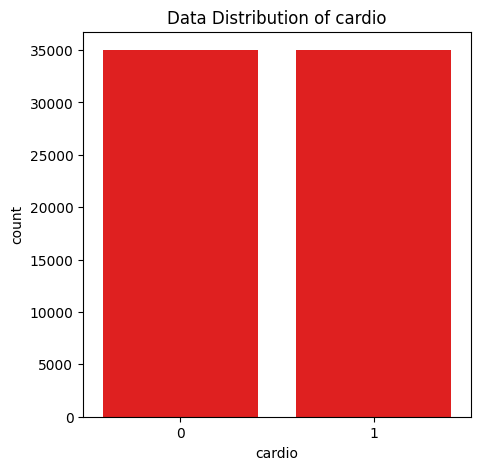

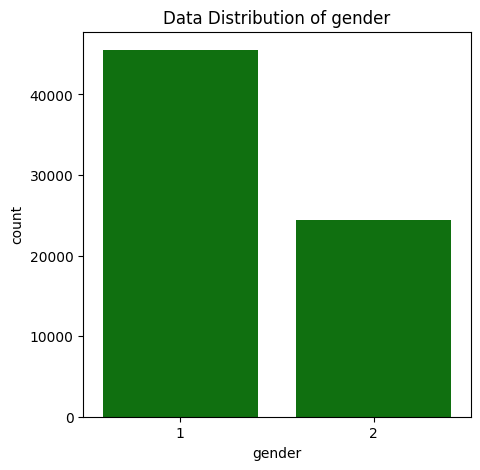

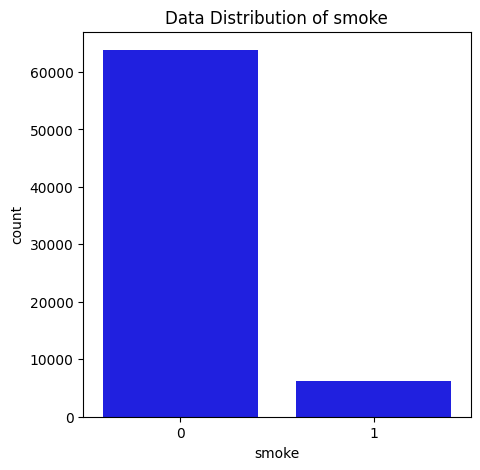

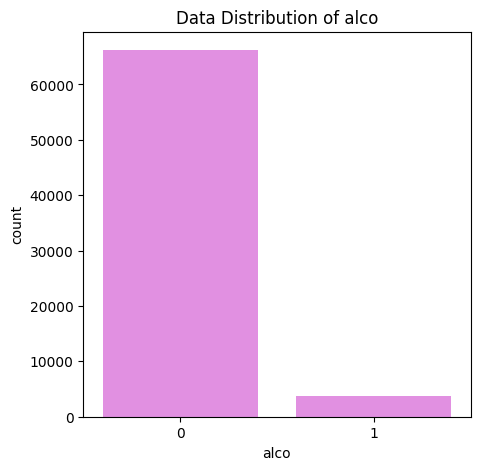

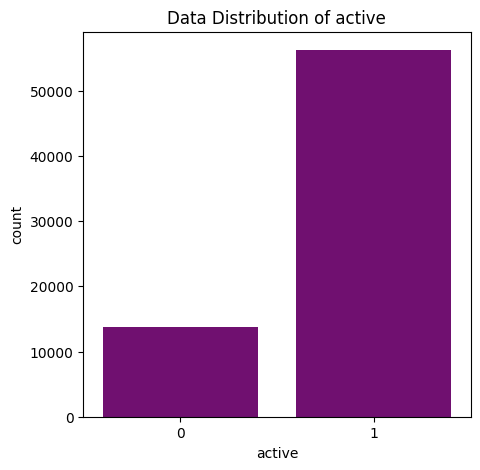

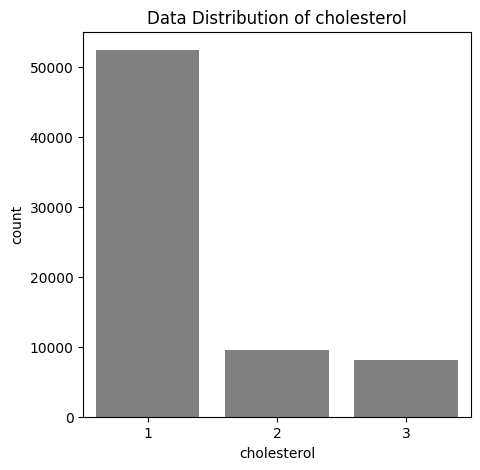

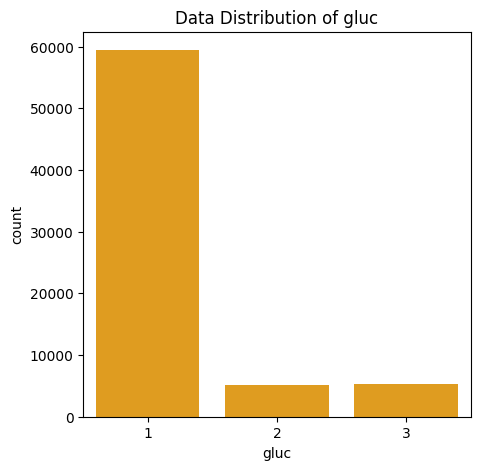

In [ ]:
color_list=["red", "green", "blue","violet","purple","grey","orange"]
col_list=["cardio", "gender", "smoke","alco","active", "cholesterol","gluc"]
for i in range(len(col_list)):
    plt.figure(figsize=(5,5))
    sns.countplot(data=dataframe, x=dataframe[col_list[i]], color=color_list[i])
    plt.title(f"Data Distribution of {col_list[i]}")
    plt.show()

# Let see the distribution of Numerical columns

In [ ]:
# The age is in 1000's lets convert it into hundred's
dataframe["age"]=dataframe["age"]/1000
dataframe["age"]

,age
0,18.393
1,20.228
2,18.857
3,17.623
4,17.474
...,...
69995,19.240
69996,22.601
69997,19.066
69998,22.431


# Bivariate Analysis

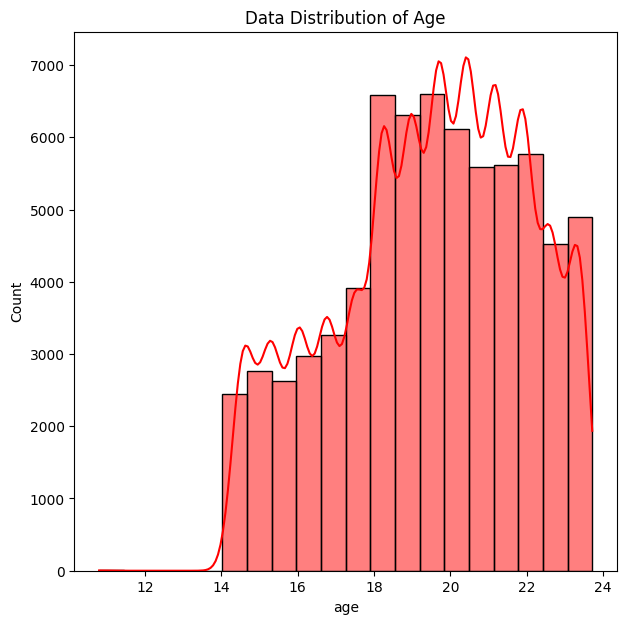

In [ ]:
# Lets see the data distribution of age
plt.figure(figsize=(7,7))
sns.histplot(x=dataframe["age"], kde=True, color="red", bins=20)
plt.title("Data Distribution of Age")
plt.show()

# Lets check the correaltion of Cardio with Age

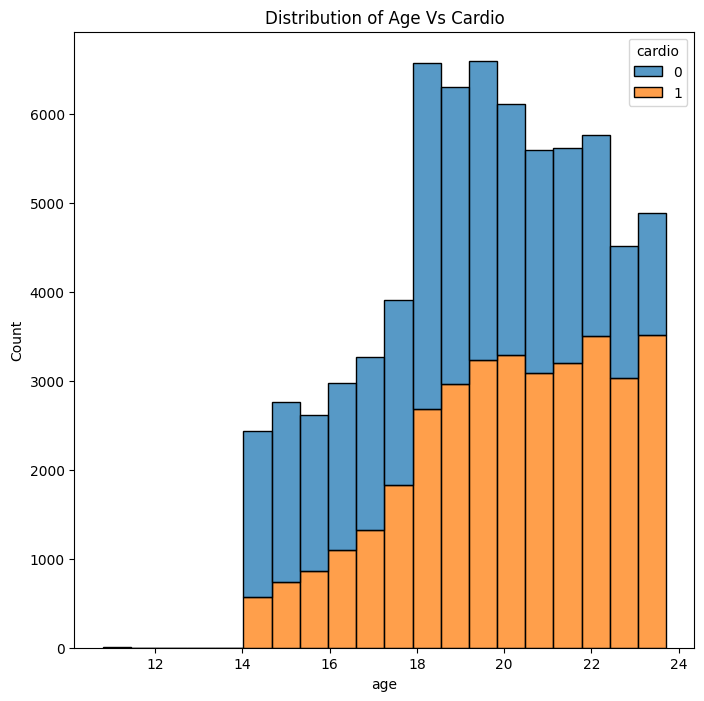

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data= dataframe, x=dataframe["age"], hue="cardio", multiple='stack',bins=20)
plt.title("Distribution of Age Vs Cardio")
plt.show()

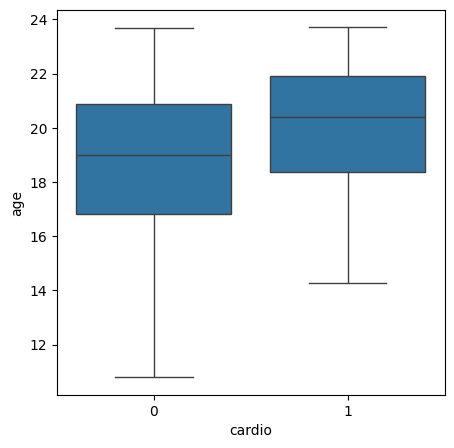

In [ ]:
# Lets check the outliers in the age column
plt.figure(figsize=(5,5))
sns.boxplot(data= dataframe, x=dataframe["cardio"], y=dataframe["age"])
plt.show()

> # This plot simply tells us that the most of the percentile that have a high risk of cardivascular is above the age of 18.

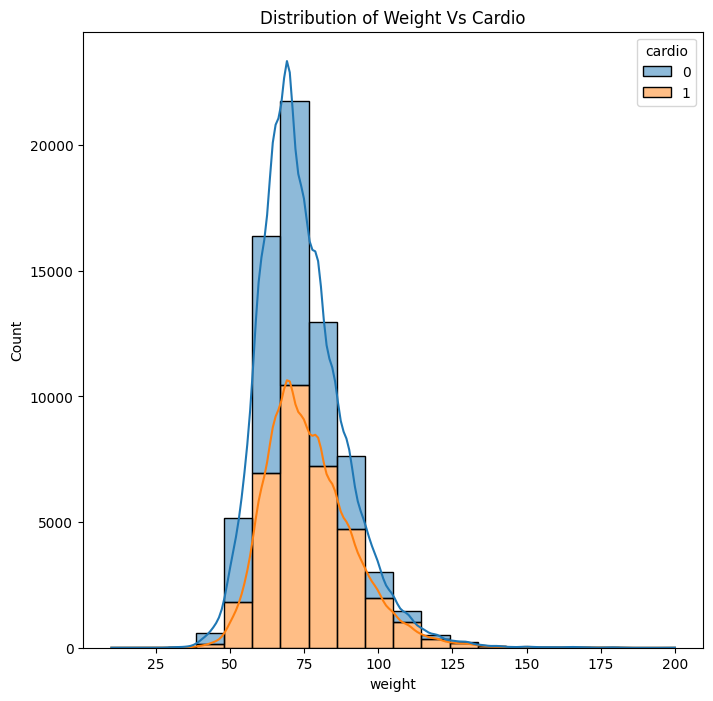

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data= dataframe, x=dataframe["weight"], hue="cardio", multiple='stack',kde=True, bins=20)
plt.title("Distribution of Weight Vs Cardio")
plt.show()

> # Here we can see that as the weight of the person increases, the risk of cardiovascular also increases.

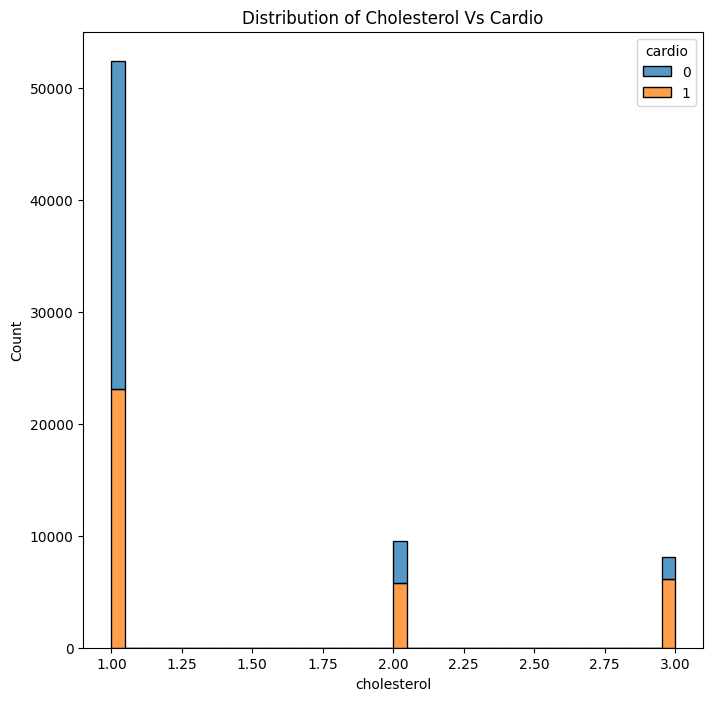

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data= dataframe, x=dataframe["cholesterol"], hue="cardio", multiple='stack')
plt.title("Distribution of Cholesterol Vs Cardio")
plt.show()

> # Here we can notice that as the cholesterol level of the person increases,the risk of cardiovascular also increases.

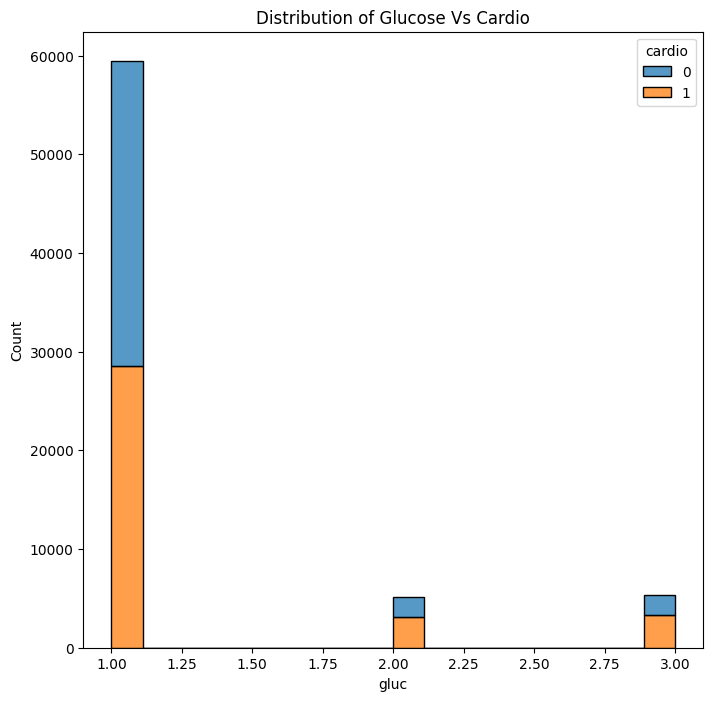

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data= dataframe, x=dataframe["gluc"], hue="cardio", multiple='stack')
plt.title("Distribution of Glucose Vs Cardio")
plt.show()

> # Here we can notice that higher the level of Glucose, Higher the chances of Cardiovascular.

# Split the data into Train and Test

In [ ]:
def train_test_split_data(dataframe,target,test_size, random_state):
    x_train,x_test, y_train, y_test= train_test_split(dataframe.drop([target], axis=1),
                                                      dataframe[target],
                                                      test_size=test_size,
                                                      random_state=random_state,
                                                      stratify=dataframe[target]
                                                      )

    return x_train,x_test, y_train, y_test

In [ ]:
 x_train,x_test, y_train, y_test= train_test_split_data(dataframe,target="cardio",test_size=0.3, random_state=42)

In [ ]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((48983, 11), (20993, 11), (48983,), (20993,))

In [ ]:
numerical_cols=["age","weight","height","ap_hi","ap_lo"]

# Lets detect the outliers in the dataset Using Percentile Capping Method

In [ ]:
def Winsorization_Method(columns, x_train, y_train , a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(x_train[col], a)
        q2= np.percentile(x_train[col],b)

        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos)

    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)

    ratio= round(len(outliers)/len(x_train)*100, 2)                       # Ratio of outliers
    x_train.drop(x_train.index[outliers], inplace=True)    # remove the outliers from the training dataset
    y_train.drop(y_train.index[outliers], inplace=True)



    return ratio, x_train, y_train

In [ ]:
ratio, x_train, y_train= Winsorization_Method(numerical_cols, x_train, y_train , a=1, b=99)

In [ ]:
print(f"Ratio of Outliers detected in Dataset:{ratio}")

Ratio of Outliers detected in Dataset:6.84


# Data Preprocessing

In [ ]:
# Let scale the numerical values
scaler=RobustScaler()
x_train[numerical_cols]= scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols]= scaler.fit_transform(x_test[numerical_cols])

In [ ]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
33781,-0.892001,2,-0.090909,-0.941176,0.0,-1.0,1,1,1,0,0
32773,0.399523,1,-0.727273,0.470588,0.5,0.0,1,1,0,0,1
26226,-0.281841,2,0.000000,1.529412,0.0,1.0,2,1,1,0,1
32376,-0.470133,2,1.454545,0.176471,1.0,1.0,1,1,0,0,0
62833,-0.664383,2,1.545455,1.941176,1.0,1.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
18647,0.345896,2,0.363636,0.000000,0.0,0.0,1,1,0,0,1
51757,-1.136303,1,0.545455,-0.823529,-0.5,-1.0,1,1,0,0,1
57352,0.165053,1,-1.181818,-0.352941,0.5,0.0,1,1,0,0,1
7129,0.171309,1,-0.272727,-0.705882,0.0,0.0,1,1,0,0,1


In [ ]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
51171,0.611412,2,1.000000,1.470588,1.00,0.0,3,2,0,0,1
33829,0.738237,1,-1.636364,-0.529412,0.50,1.0,1,1,0,0,0
3406,-0.419416,2,0.818182,0.235294,-0.50,-2.0,1,2,0,0,1
45984,0.372093,1,-0.636364,-0.176471,-0.50,-1.0,1,1,0,0,0
47591,0.423472,1,-0.454545,0.294118,-0.25,-1.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
50939,-1.031098,1,0.272727,-0.705882,0.00,0.0,1,1,0,0,0
13067,0.389670,1,-1.454545,0.882353,1.00,1.0,3,3,0,0,1
58997,0.562196,1,-0.909091,-0.941176,0.00,0.0,1,1,0,0,1
32285,-0.126014,1,-0.181818,-0.176471,0.00,0.0,1,1,0,0,1


Accuracy:[0.733101510027152]
ROC AUC:[np.float64(0.7350789756864435)]
Recall:[0.7565326896841221]
Precision:[0.6870949294700724]
F1-Score:[0.7201438489585935]
Classification_Report
-----------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10501
           1       0.76      0.69      0.72     10492

    accuracy                           0.73     20993
   macro avg       0.74      0.73      0.73     20993
weighted avg       0.74      0.73      0.73     20993

Confusion_Matrix
----------------------


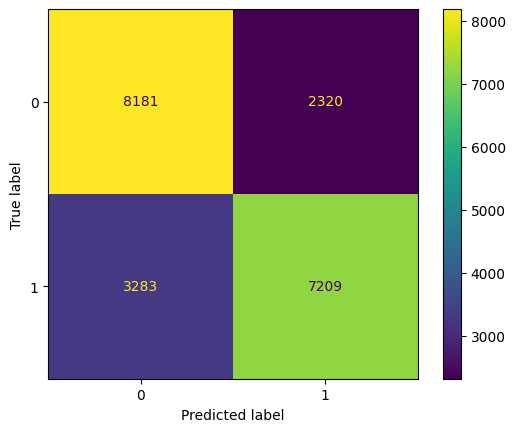

In [ ]:
# Create the list to store the result
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []

# Create a Model
gbc= GradientBoostingClassifier(max_features=11, min_samples_split=5)
gbc1= GradientBoostingClassifier(max_features=11, min_samples_split=5)
rf=RandomForestClassifier(max_features=11, min_samples_leaf=10, n_estimators=300)
lr= LogisticRegression(penalty='l1' , solver='liblinear')


voting_clf= VotingClassifier(estimators=[('gradient_boosting', gbc),('gradient_boosting1', gbc1),('random_forest',rf),('logistic_regression',lr)], voting='soft', n_jobs=-1)
voting_clf.fit(x_train, y_train)
y_pred= voting_clf.predict(x_test)


accuracy_scores.append(accuracy_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
auc_roc_scores.append(roc_auc_score(y_pred, y_test))


# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"ROC AUC:{auc_roc_scores}")
print(f"Recall:{recall_scores}")
print(f"Precision:{precision_scores}")
print(f"F1-Score:{f1_scores}")


print("Classification_Report")
print("-----------------------")
print(classification_report(y_test,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
# create a result dataframe
model_names = ['VotingClassifier']
result_df=pd.DataFrame({"Accuracy": accuracy_scores, "Precision_Score":precision_scores, "Recall_Score":recall_scores, "F1_Score":f1_scores, "AUC_ROC_Score":auc_roc_scores}, index=model_names)
result_df

,Accuracy,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
VotingClassifier,0.733102,0.687095,0.756533,0.720144,0.735079


# Visualise the Results

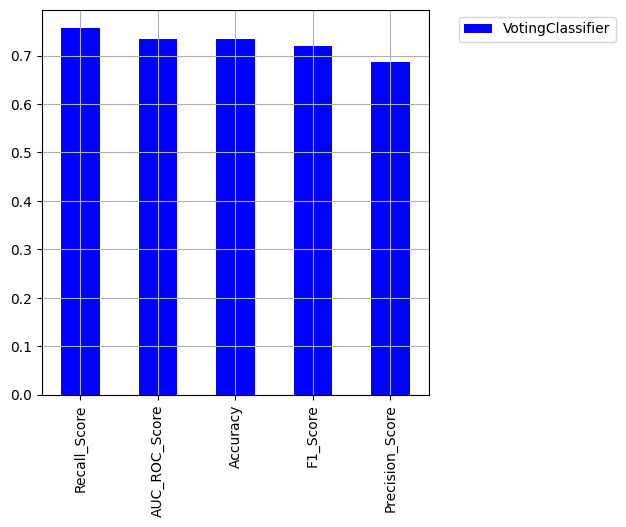

In [ ]:
result_df.T.sort_values(by="VotingClassifier", ascending=False).plot(kind="bar", grid=True, figsize=(5,5), color="blue").legend(bbox_to_anchor=(1.5,1));

# Simple Neural Network

Epoch 1/500
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6928 - loss: 0.5917
Epoch 2/500
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7242 - loss: 0.5567
Epoch 3/500
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7285 - loss: 0.5505
Epoch 4/500
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7291 - loss: 0.5510
Epoch 5/500
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7276 - loss: 0.5512
Epoch 6/500
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7309 - loss: 0.5466
Epoch 7/500
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7301 - loss: 0.5508
Epoch 8/500
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7325 - loss: 0.5440
Epoch 9/500
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7336 - loss: 0.5451
Epoch 10/500
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7325 - loss: 0.5445
Epoch 11/500
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7306 - loss: 0.5465
Epoch 12/500
1426/1

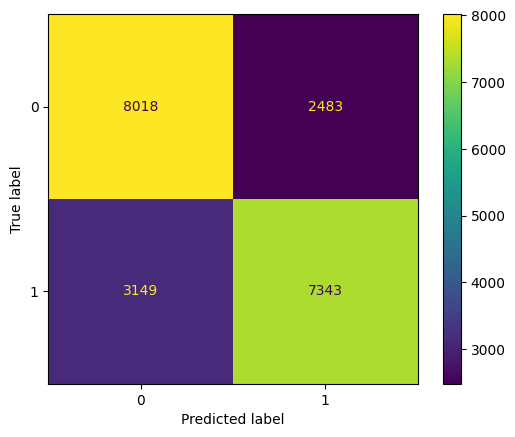

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential



accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []


# create a model
model=Sequential()
model.add(Dense(10, input_dim=x_train.shape[1],activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(1, activation="sigmoid"))         # In Output layer sigmoid is used as a activation function

# Compile the model
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"]) # Changed lr to learning_rate
#model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])


# Callbacks-- Stop training automatically once the model performance stop improving
callback= tf.keras.callbacks.EarlyStopping(monitor="loss", patience=4)

# Fit the model
model.fit(x_train, y_train,epochs=500, batch_size=32, callbacks=[callback],verbose=1)

# Predictions
y_pred= model.predict(x_test)
y_preds= tf.round(y_pred)



accuracy_scores.append(accuracy_score(y_preds, y_test))
precision_scores.append(precision_score(y_preds, y_test))
recall_scores.append(recall_score(y_preds, y_test))
f1_scores.append(f1_score(y_preds, y_test))
auc_roc_scores.append(roc_auc_score(y_preds, y_test))


# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"ROC AUC:{auc_roc_scores}")
print(f"Recall:{recall_scores}")
print(f"Precision:{precision_scores}")
print(f"F1-Score:{f1_scores}")


print("Classification_Report")
print("-----------------------")
print(classification_report(y_test,y_preds))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
plt.show()

In [ ]:
# create a result dataframe
model_names = ['SimpleNeuralNetwork']
result_df=pd.DataFrame({"Accuracy": accuracy_scores, "Precision_Score":precision_scores, "Recall_Score":recall_scores, "F1_Score":f1_scores, "AUC_ROC_Score":auc_roc_scores}, index=model_names)
result_df

,Accuracy,Precision_Score,Recall_Score,F1_Score,AUC_ROC_Score
SimpleNeuralNetwork,0.73172,0.699867,0.747303,0.722807,0.732656


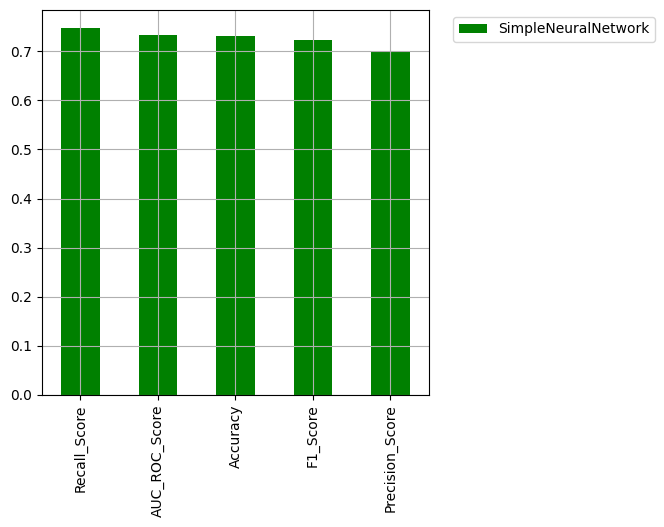

In [ ]:
result_df.T.sort_values(by="SimpleNeuralNetwork", ascending=False).plot(kind="bar", figsize=(5,5), color="green", grid=True).legend(bbox_to_anchor=(1.6,1));


       Conclusion
       
